# Exploratory Data Analysis for Capstone Project

Let's explore a dataset on health-related costs for different individuals using the [Kaggle: US Health Insurance Data Set](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Notice that there are no null entries in the data set, but there could still be data entry errors so let's have a look at the numeric columns

In [3]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [4]:
for col in df.columns:
    if df[col].dtype != 'object':
        low_bound = df[col].mean() - (3 * df[col].std())
        upper_bound = df[col].mean() + (3 * df[col].std())
        for value in df[col].values:
            if (value < low_bound or value > upper_bound):
                print(f'{col} has an outlier with value of {value}')

bmi has an outlier with value of 49.06
bmi has an outlier with value of 50.38
bmi has an outlier with value of 52.58
bmi has an outlier with value of 53.13
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
children has an outlier with value of 5
charges has an outlier with value of 51194.55914
charges has an outlier with value of 63770.42801
charges has an outlier wit

It is difficult to tell if the bmi outliers are data entry errors or not. Likely the children outliers are not errors. Unsure about charges outliers.

We will leave them all as is

Let's look at the descriptive stats of each columns

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Let's look at the distributions of the numerical data (age, bmi, charges)

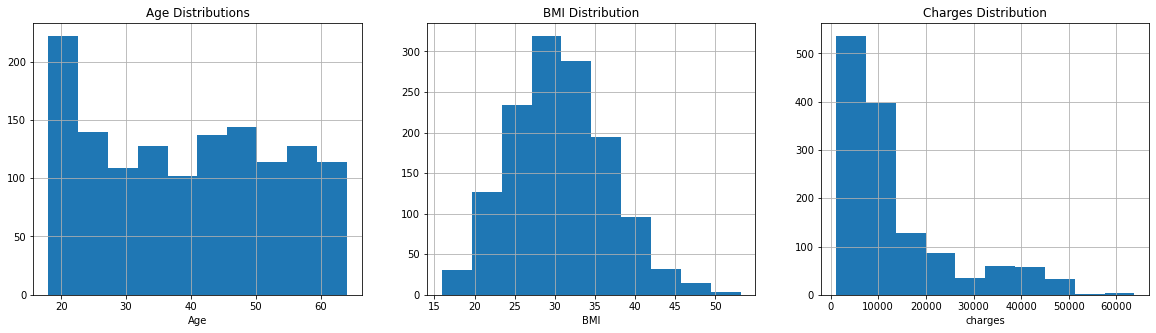

In [6]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
df['age'].hist()
plt.xlabel('Age')
plt.title('Age Distributions')

plt.subplot(1,3,2)
df['bmi'].hist()
plt.xlabel('BMI')
plt.title('BMI Distribution')

plt.subplot(1,3,3)
df['charges'].hist()
plt.xlabel('charges')
plt.title('Charges Distribution')
plt.show()

We see that Age distribution is relatively flat with the exception of 18~25. BMI has a somewhat normal distribution. Charges are heavily populated in the lower costs region.

Now let's look at categorical data (sex, smoker, region)

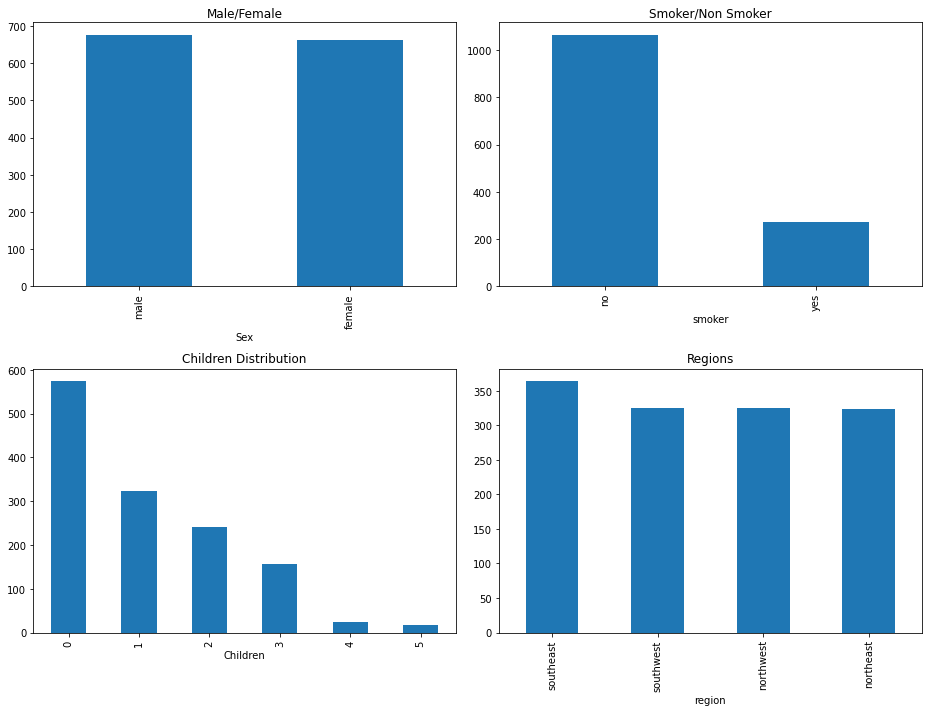

In [7]:
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)
df['sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.title('Male/Female')

plt.subplot(2,2,2)
df['smoker'].value_counts().plot(kind='bar')
plt.xlabel('smoker')
plt.title('Smoker/Non Smoker')

plt.subplot(2,2,3)
df['children'].value_counts().plot(kind='bar')
plt.xlabel('Children')
plt.title('Children Distribution')

plt.subplot(2,2,4)
df['region'].value_counts().plot(kind='bar')
plt.xlabel('region')
plt.title('Regions')
plt.tight_layout()
plt.show()

Let's look at the correlations of each column with charges

Chose colors according to your needs following [seaborn docs](https://seaborn.pydata.org/tutorial/color_palettes.html)

<AxesSubplot:>

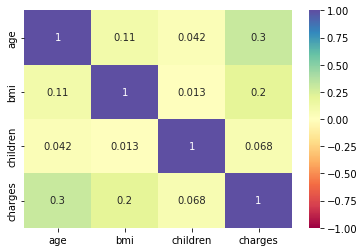

In [8]:
corrM = df.corr()
sns.heatmap(corrM, vmin=-1, vmax=1, annot=True, cmap = 'Spectral')

Let's get dummy variables for the sex and smoking status

In [9]:
df_dummies = pd.get_dummies(df, columns = ['sex', 'region', 'smoker'], drop_first = True)

<AxesSubplot:>

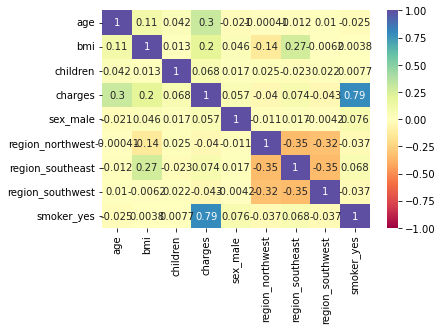

In [10]:
dummies_corrM = df_dummies.corr()
sns.heatmap(dummies_corrM, vmin=-1, vmax=1, annot=True, cmap = 'Spectral')

## Statistcal Analysis

We see that there is a significant correlation of smoker_yes with charges. Let's check if charges are higher for smokers than non-smokers.

* The null hypothesis: Charges of smoker and non-smoker are the same
* The alternative: Charges of smoker and non-smoker are not the same

Let's set up a t-test and see the results

In [11]:
import scipy.stats as stats

In [12]:
#T-test set up
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

#Selecting charges corresponding to smokers
smoker_charges = df['charges'][df_dummies.smoker_yes == 1]
#Selecting charges corresponding to non-smokers
non_smoker_charges = df['charges'][df_dummies.smoker_yes == 0]

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(smoker_charges, non_smoker_charges, axis = 0)

# Setting our significance level at 5%
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


## Machine Learning Model

Let's create a Regression Machine Learning Model to predict the costs incured by a new customer with attributes (age, sex, bmi, children, smoker, region)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = df_dummies.drop(columns = 'charges').copy()
y = df_dummies[['charges']].copy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 9)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's assess how our model is doing compared to the test set

In [17]:
charge_predictions = model.predict(X_test)

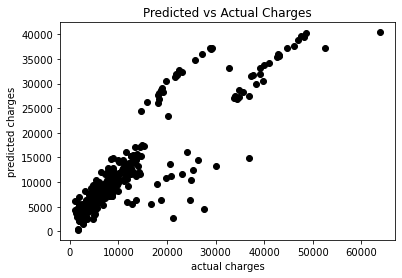

In [18]:
# Plot outputs
plt.scatter(y_test, charge_predictions, color="black")
#plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.title('Predicted vs Actual Charges')

plt.show()

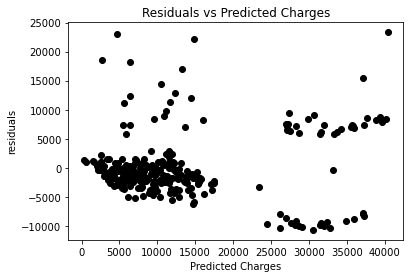

In [19]:
# Plot outputs
residuals = y_test - charge_predictions
plt.scatter(charge_predictions, residuals, color="black")
plt.xlabel('Predicted Charges')
plt.ylabel('residuals')
plt.title('Residuals vs Predicted Charges')

plt.show()

In [20]:
model.score(X_test, y_test)

0.7775428684674436

We can try to optimize with hyperparameter tuning and feature engineering 

## Summary
Overall, this data set helps us answer some questions regarding health-costs for individuals. Given attributes from an individual and the healthcare charges that individual has incurred we can create a machine learning model to predict healthcare charges for new customers/individuals.

We are also able to test some hypotheses/answer these questions based on the sample in this dataset:
* Is there a relation between BMI and Age?
* Is there a relation between Age and Children?
* Are the charges of smokers higher than non-smokers?
* Are the charges of males higher than females?
* Are the charges higher in specific regions?